## Anomaly Detection Using Isolation Forest 

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./dataset/healthcare.csv')
df.head()

,0,1
0,1.616671,1.944522
1,1.256461,1.609444
2,-2.343919,4.392961
3,1.195393,2.794485
4,-3.329586,5.303160


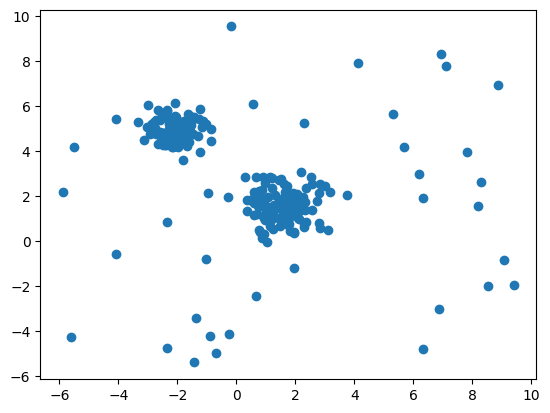

In [7]:
plt.scatter(df.iloc[:,0], df.iloc[:,1])
plt.show()

In [12]:
# Make the Model
from sklearn.ensemble import IsolationForest
clf = IsolationForest(contamination=0.2)
clf.fit(df)
predictions = clf.predict(df)

/home/utpal/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [13]:
predictions

array([ 1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1,
        1,  1, -1,  1, -1,  1,  1,  1,  1, -1, -1, -1, -1,  1,  1,  1, -1,
        1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,
       -1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1, -1, -1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1,
       -1,  1,  1,  1,  1

In [16]:
outlier_indexs = np.where(predictions<0)
outlier_indexs

(array([  4,  20,  24,  31,  45,  48,  49,  53,  55,  60,  61,  62,  63,
         67,  72,  74,  78,  83,  85,  87,  92,  97, 108, 114, 119, 126,
        130, 132, 133, 141, 151, 160, 166, 167, 177, 179, 182, 187, 197,
        199, 204, 209, 212, 217, 220, 221, 227, 242, 247, 248]),)

In [20]:
x = df.values

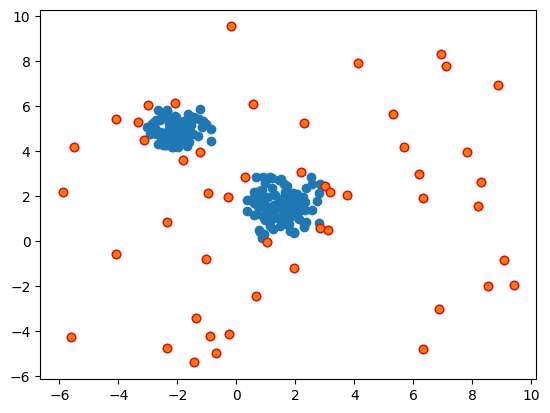

In [26]:
plt.scatter(df.iloc[:,0], df.iloc[:,1])
plt.scatter(x[outlier_indexs,0], x[outlier_indexs,1], edgecolors='r')
plt.show()

In [28]:
from sklearn.cluster import KMeans

In [42]:
wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

/home/utpal/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/utpal/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/utpal/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/utpal/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/utpal/.local/lib/python3.10/si

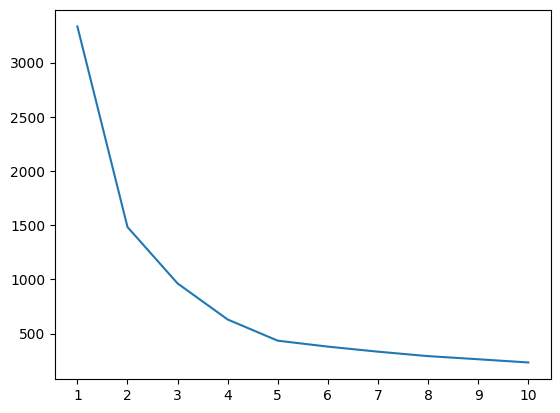

In [43]:
plt.plot(range(1,11), wcss)
plt.xticks(range(1,11))
plt.show()

In [41]:
# Count No of Clusters Automatically
from kneed import KneeLocator
kneed = KneeLocator(range(1,11), wcss, curve='convex', direction='decreasing')
kneed.elbow

3

In [44]:
kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans.fit(df)

/home/utpal/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

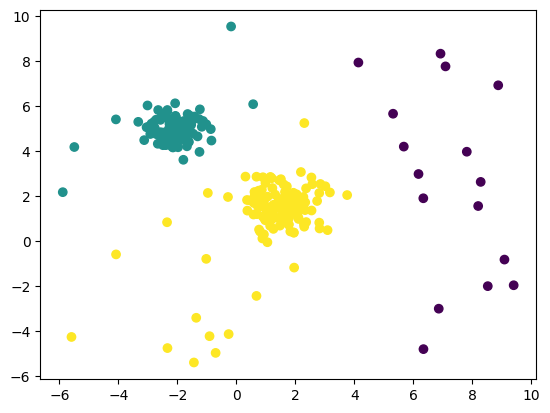

In [45]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=kmeans.labels_)
plt.show()

In [49]:
# Perform Silhoutte Score
from sklearn.metrics import silhouette_score

In [57]:
silhouette_coefficients = []

for k in range(2,11):
    kmenas = KMeans(n_clusters=k, init='k-means++')
    kmenas.fit(df)
    score = silhouette_score(df, kmeans.labels_)
    silhouette_coefficients.append(score)

/home/utpal/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/utpal/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/utpal/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/utpal/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/utpal/.local/lib/python3.10/si

In [60]:
silhouette_coefficients

[0.620028463510151,
 0.620028463510151,
 0.620028463510151,
 0.620028463510151,
 0.620028463510151,
 0.620028463510151,
 0.620028463510151,
 0.620028463510151,
 0.620028463510151]

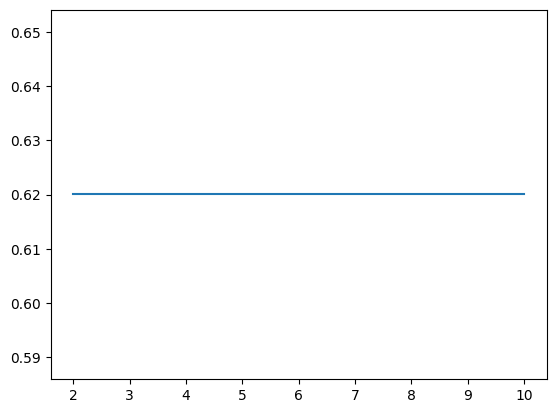

In [59]:
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.show()